In [7]:
# %pip install matplotlib
# %pip install pandas
# %pip install requests

In [15]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
from datetime import datetime, timedelta
import numpy as np
import matplotlib.colors as mcolors

In [9]:
# this list contatins the years where we want to gather the data
# http://fenyi.solarobs.epss.hun-ren.hu/ftp/pub/DPD/data/
# the site only goes up to 2018
list_of_years = [1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
# list_of_years = [1974, 1975, 1976]
sunspot_latitudes = dict()

In [10]:
def getData(year):
    url = f"http://fenyi.solarobs.epss.hun-ren.hu/ftp/pub/DPD/data/DPD{year}.txt"
    response = requests.get(url)

    if response.status_code != 200:
        print(f"Could not connect to {url}")
    else:
        content = response.text
        lines = content.splitlines()
        for line in lines:
            if line.startswith("g"):
                row = line.split()
                
                # row[1] = year
                # row[2] = month
                # row[3] = day
                # row[4] = hour
                # row[5] = minute
                # row[6] = second
                # row[7] = sunspot group number
                # row[11] = Total corrected WS whole spot area of the group in millionths of the solar hemisphere
                # row[12] = Heliographic latitude B; positive: North, negative: South

                
                if row[7].isdigit():
                    if float(row[12]) <= 90 and float(row[12]) >= -90:
                        try:
                            sunspot_latitudes[datetime(year, int(row[2]), int(row[3]))].append(float(row[12]))
                        except:
                            sunspot_latitudes[datetime(year, int(row[2]), int(row[3]))] = [float(row[12])]
                            # (int(row[11]), float(row[12]))

In [11]:
for year in list_of_years:
    getData(year)

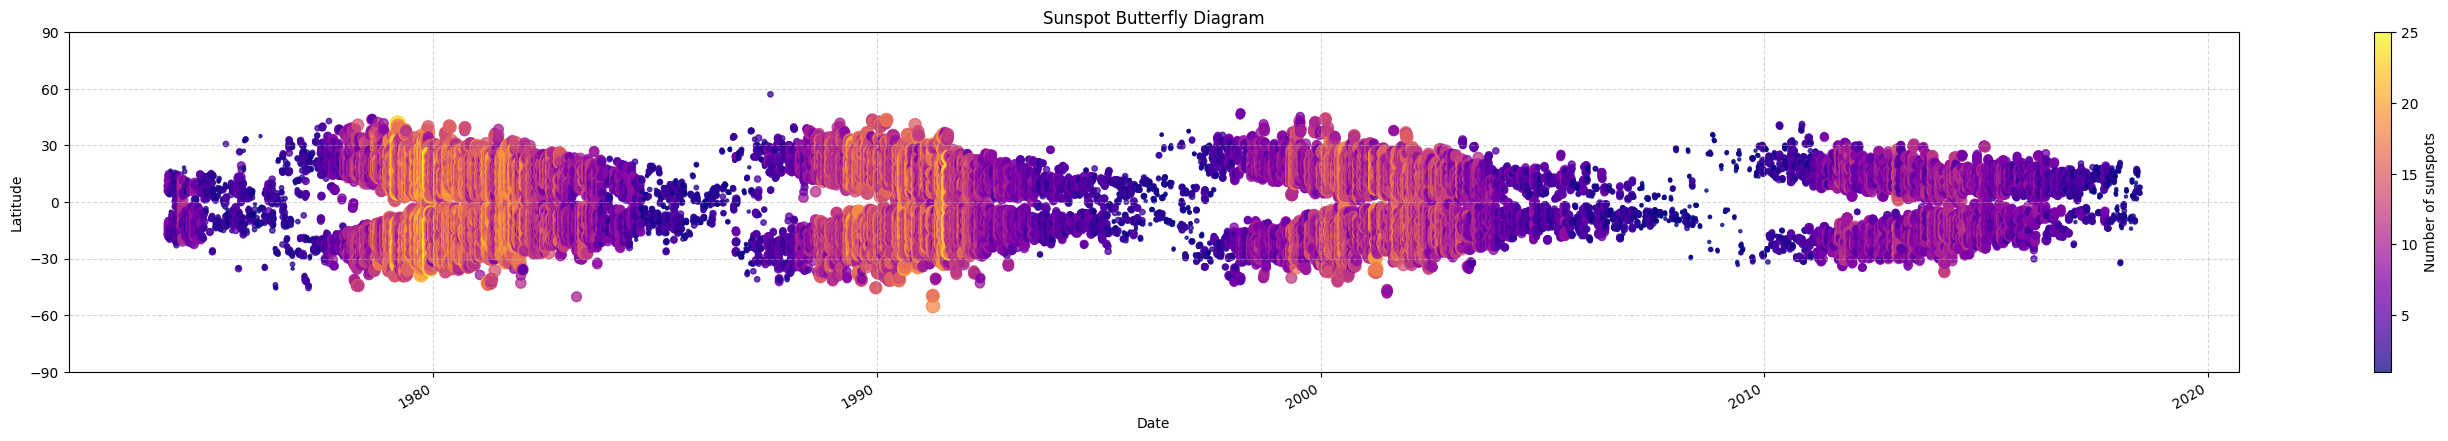

In [28]:
# Initialize lists for plotting
dates = []
latitudes = []
counts = []


# Loop through the dictionary and collect the data
for date, lat_list in sunspot_latitudes.items():
    num_spots = len(lat_list)  # Number of sunspots on this date
    dates.extend([date] * len(lat_list))  # Repeat the date for each latitude
    latitudes.extend(lat_list)  # Add all latitudes
    counts.extend([num_spots] * len(lat_list))  # Use the count to adjust color or size

# Create scatter plot
plt.figure(figsize=(35, 5))  # Set a wide figure size for better spacing
#scatter = plt.scatter(dates, latitudes, c=latitudes, cmap='RdYlBu_r', s=10, alpha=0.6)
scatter = plt.scatter(dates, latitudes, c=counts, cmap='plasma', s=np.array(counts) * 5, alpha=0.75)

# Label the axes
plt.xlabel('Date')
plt.ylabel('Latitude')
plt.title('Sunspot Butterfly Diagram')

# Invert the y-axis to match the top-down format
plt.gca()#.invert_yaxis()

# Add gridlines
plt.grid(True, which='both', axis='both', linestyle='--', alpha=0.5)

# Add color bar for reference
plt.colorbar(label='Number of sunspots')

# Set x-axis limits to make it wider
#plt.xlim([min(dates) - timedelta(days=3650), max(dates) + timedelta(days=3650)])  # Adjust for one year on each side

# Set x-axis major ticks to be every 10 years
plt.gca().xaxis.set_major_locator(mdates.YearLocator(10))  # Major ticks every 10 years
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Format ticks as years

# Automatically format the x-axis labels
plt.gcf().autofmt_xdate()

# Set y-axis ticks at intervals of 30 degrees
plt.yticks(np.arange(-90, 91, 30))

# Add some padding between the plot and the axes
plt.subplots_adjust(bottom=0.2)

# Show the plot
plt.show()